## Generating Training and Test Data for the Mass-Spring-Damper Model 

In [1]:
### Importing Libraries

import sys
print(sys.version)
import os
import numpy as np
import pandas as pd
import time

import matplotlib.pyplot as plt
WORKSPACE_PATH  = os.environ['WORKSPACE_PATH']
plt.style.use(WORKSPACE_PATH+'/ROMNet/romnet/extra/postprocessing/presentation.mplstyle')

import cantera as ct
from scipy.integrate import solve_ivp

3.8.9 (default, Apr  3 2021, 01:51:00) 
[Clang 12.0.0 (clang-1200.0.32.29)]


In [2]:
### Input Data

OutputDir  = WORKSPACE_PATH+'/ROMNet/Data/MSD_10Cases/'
TestDir    = WORKSPACE_PATH+'/ROMNet/Data/MSD_10Cases_Test/'
try:
    os.makedirs(OutputDir)
except OSError as e:
    pass
try:
    os.makedirs(TestDir)
except OSError as e:
    pass

NTraining  = 10
NTest      = 10  
Nt         = 100
tout       = np.linspace(0.,15.,Nt)
SOLVER     = 'Radau'

In [3]:
### Defining ODE and its Parameters

def fOrig(t, y):
    return [y[1], -Params[2]/Params[0]*y[0]-Params[1]/Params[0]*y[1]]

def fOrig_Source(t, y):
    return [y[1], -Params[2]/Params[0]*y[0]-Params[1]/Params[0]*y[1]]

def fOrig_Jacobian(t, y):

    Eps = 1e-6
    J   = np.zeros([len(y), len(y)], dtype = np.float)

    for i in range(len(y)):
        y1 = y.copy()
        y2 = y.copy()

        y1[i] += Eps
        y2[i] -= Eps

        f1 = np.array(fOrig(t, y1))
        f2 = np.array(fOrig(t, y2))

        J[ : , i] = (f1 - f2) / (2. * Eps)

    return J

Params = np.array([1.0, 0.5, 3.0], dtype=np.float64)

y0 =  [-1.31420311  0.84031196]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [ 0.6502554  -0.94960164]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-1.04238151 -0.18427231]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-0.72268519  0.30422776]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-0.5518504   0.47949234]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [ 1.5628253  -0.80742666]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [1.79132863 0.25327647]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-0.58132657 -0.25555591]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [ 1.04148973 -0.7209269 ]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-0.64764009 -0.07269186]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


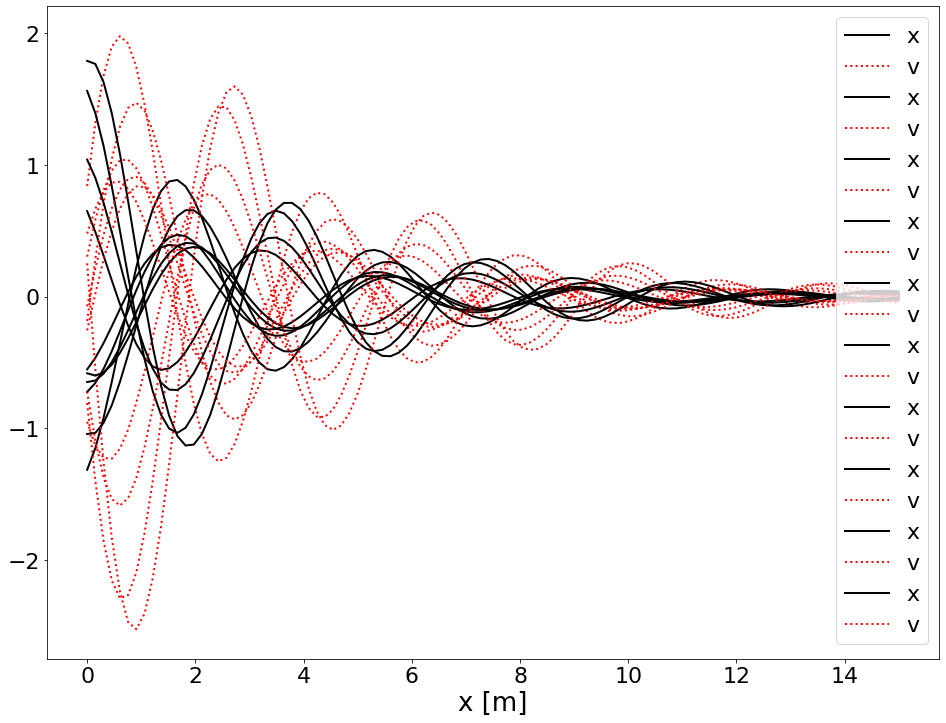

In [4]:
### Generating Training Data

# Sampling Initial Conditions
y0Mat      = np.zeros((NTraining,2))
y0Mat[:,0] = np.random.rand(NTraining)*4. - 2.0
y0Mat[:,1] = np.random.rand(NTraining)*2. - 1.0

fig   = plt.figure(figsize=(16, 12))
for iSample in range(NTraining):
    y0         = y0Mat[iSample,:]
    print('y0 = ', y0)
    
    output     = solve_ivp( fOrig, tout[[0,-1]], y0, method=SOLVER, t_eval=tout, rtol=1.e-15, atol=1.e-10 )
    
    tMatTemp   = tout[...,np.newaxis]
    uMatTemp   = np.tile(y0, (Nt, 1))
    
    plt.plot(output.t, output.y[0,:], '-k', label='x')
    plt.plot(output.t, output.y[1,:], ':r', label='v')
    plt.legend()
    plt.xlabel('t [s]')
    plt.xlabel('x [m]')
        
    ySourceTemp = np.zeros_like(output.y)
    JJTauMat    = np.zeros((output.y.shape[1], output.y.shape[0]*2))
    for it in range(Nt):
        ySourceTemp[:,it] = fOrig_Source(output.t, output.y[:,it])
        JJ                = fOrig_Jacobian(it, output.y[:,it])        
        JJEig, JJVec      = np.linalg.eig(JJ)
        JJTauMat[it,0:2]  = 1./JJEig.real
        JJTauMat[it,2:4]  = 1./JJEig.imag

    if (iSample == 0):
        tMat    = tMatTemp
        uMat    = uMatTemp
        yMat    = output.y.T 
        ySource = ySourceTemp.T
    else:
        tMat    = np.concatenate((tMat,    tMatTemp), axis=0)
        uMat    = np.concatenate((uMat,    uMatTemp), axis=0)
        yMat    = np.concatenate((yMat,    output.y.T), axis=0)
        ySource = np.concatenate((ySource, ySourceTemp.T), axis=0)
        

y0 =  [-0.98389917 -0.41951141]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-1.07856426 -0.21291579]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [0.11556997 0.48935105]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [1.50491903 0.80208772]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [ 0.96309324 -0.46863283]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [ 0.51190231 -0.37110704]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [0.57863626 0.68764244]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [-0.44206703 -0.82275602]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [0.79873556 0.13289475]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


y0 =  [1.18043588 0.56225144]


/usr/local/lib/python3.8/site-packages/scipy/integrate/_ivp/common.py:47: UserWarning: `rtol` is too low, setting to 2.220446049250313e-14
  warn("`rtol` is too low, setting to {}".format(100 * EPS))


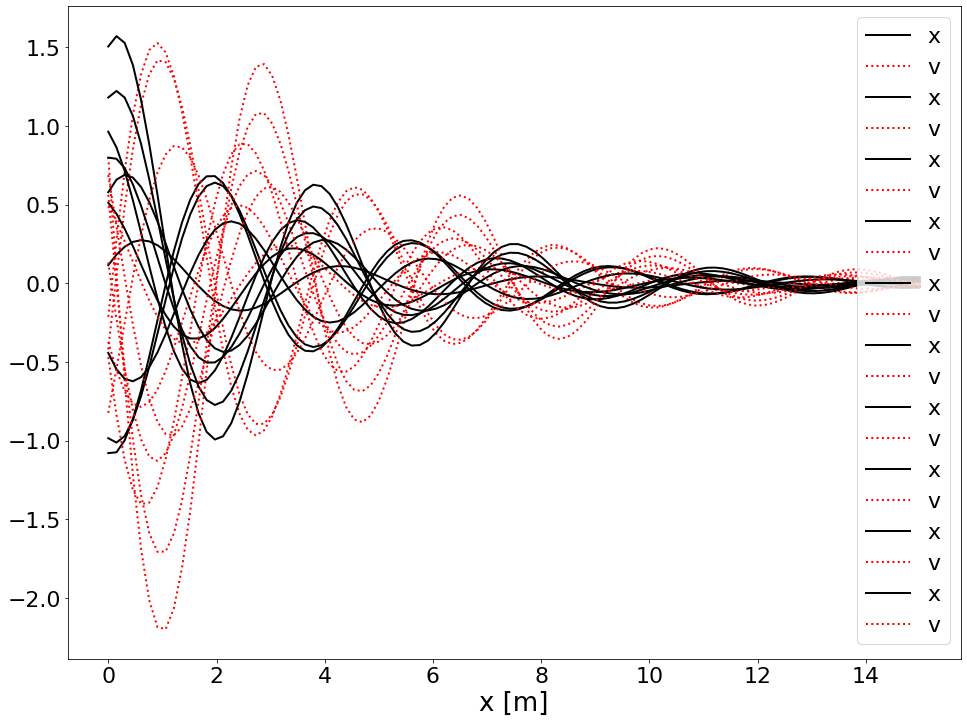

In [5]:
### Generating Test Data

# Sampling Initial Conditions
y0MatTest      = np.zeros((NTest,2))
y0MatTest[:,0] = np.random.rand(NTest)*4. - 2.0
y0MatTest[:,1] = np.random.rand(NTest)*2. - 1.0


fig   = plt.figure(figsize=(16, 12))
for iSample in range(NTest):
    y0         = y0MatTest[iSample,:]
    print('y0 = ', y0)
    
    output     = solve_ivp( fOrig, tout[[0,-1]], y0, method=SOLVER, t_eval=tout, rtol=1.e-15, atol=1.e-10 )
    
    tMatTemp   = tout[...,np.newaxis]
    uMatTemp   = np.tile(y0, (Nt, 1))
    
    plt.plot(output.t, output.y[0,:], '-k', label='x')
    plt.plot(output.t, output.y[1,:], ':r', label='v')
    plt.legend()
    plt.xlabel('t [s]')
    plt.xlabel('x [m]')
        
    ySourceTemp = np.zeros_like(output.y)
    for it in range(Nt):
        ySourceTemp[:,it] = fOrig_Source(output.t, output.y[:,it])

    if (iSample == 0):
        tMatTest    = tMatTemp
        uMatTest    = uMatTemp
        yMatTest    = output.y.T 
        ySourceTest = ySourceTemp.T
    else:
        tMatTest    = np.concatenate((tMatTest,    tMatTemp), axis=0)
        uMatTest    = np.concatenate((uMatTest,    uMatTemp), axis=0)
        yMatTest    = np.concatenate((yMatTest,    output.y.T), axis=0)
        ySourceTest = np.concatenate((ySourceTest, ySourceTemp.T), axis=0)
        

In [6]:
### Saving Data

Header   = 't,x,v'
FileName = OutputDir+'/Input.csv'
np.savetxt(FileName, np.concatenate((tMat,uMat), axis=1), delimiter=',', header=Header, comments='')
        
Header   = 't,x,v'
FileName = OutputDir+'/Output.csv'
np.savetxt(FileName, np.concatenate((tMat,yMat), axis=1), delimiter=',', header=Header, comments='')

Header   = 't,dx,dv'
FileName = OutputDir+'/dOutput.csv'
np.savetxt(FileName, np.concatenate((tMat,ySource), axis=1), delimiter=',', header=Header, comments='')


Header   = 'real_1,real_2,imag_1,imag_2'
FileName = OutputDir + '/Jacobian.csv'
np.savetxt(FileName, JJTauMat,    delimiter=',', header=Header, comments='')


Header   = 't,x,v'
FileName = TestDir+'/Input.csv'
np.savetxt(FileName, np.concatenate((tMatTest,uMatTest), axis=1), delimiter=',', header=Header, comments='')
        
Header   = 't,x,v'
FileName = TestDir+'/Output.csv'
np.savetxt(FileName, np.concatenate((tMatTest,yMatTest), axis=1), delimiter=',', header=Header, comments='')

Header   = 't,dx,dv'
FileName = TestDir+'/dOutput.csv'
np.savetxt(FileName, np.concatenate((tMatTest,ySourceTest), axis=1), delimiter=',', header=Header, comments='')